# Lending Club Case Study
Lending Club is one of the largest online marketplace for peer-to-peer lending. It provides an online platform to borrowers and lenders where they can transact smoothly and quickly. Lenders Club wants to conduct a study identifying the factors which contribute most to the defaults in loan payments. As a data analyst, we need to analyze the historical data and look for factors which leads to borrowers defaulting the loan.


## Business Objective
The company in scope is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 
Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 
If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. *Company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment*

In [52]:
loan_stats_dd = pd.read_excel("Data_Dictionary.xlsx", 0)
reject_stats_dd = pd.read_excel("Data_Dictionary.xlsx", 1)

## Solution Approach
#### 1.Exploration
#### 2.Data Cleaning
#### 3.Univariate Analysis
#### 4.Bivariate Analysis

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import table

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [40]:
loan_df = pd.read_csv('loan.csv')

### 1.Exploration

In [41]:
loan_df.shape

(39717, 111)

In [43]:
loan_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [ ]:
loan_df.describe()

In [45]:
#Checking columns, rows with all null values
all_null_cols = loan_df.isnull().all().sum()
all_null_rows = loan_df.isnull().all(axis=1).sum()
(all_null_cols, all_null_rows)

(54, 0)

In [63]:
#Drop null columns
all_null_cols = loan_df.isnull().all()
loan_df.columns[all_null_cols]

Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

### 2. Data Cleaning

In [67]:
#dropping columns with all null values
loan_df = loan_df.drop(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim',
       'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit'], axis=1)

In [69]:
#percentage of missing values across columns
round(loan_df.isnull().sum()/len(loan_df.index)*100,2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [70]:
#Dropping high null values
loan_df = loan_df.drop(['next_pymnt_d', 'mths_since_last_record'], axis=1)
loan_df.shape

(39717, 55)

In [71]:
#dropping free text columns
loan_df=loan_df.drop(['url','desc', 'title'],axis=1)    
loan_df.shape

(39717, 52)

In [72]:
#Checking emp_title values
loan_df.emp_title.value_counts() , loan_df.emp_title.value_counts()/len(df.index)*100

(US Army                           134
 Bank of America                   109
 IBM                                66
 AT&T                               59
 Kaiser Permanente                  56
                                  ... 
 Micros-Retail                       1
 Capps Ag Center                     1
 Extra Space Storage                 1
 All Saints Church                   1
 Evonik Goldschmidt Corporation      1
 Name: emp_title, Length: 28820, dtype: int64,
 US Army                           0.337387
 Bank of America                   0.274442
 IBM                               0.166176
 AT&T                              0.148551
 Kaiser Permanente                 0.140998
                                     ...   
 Micros-Retail                     0.002518
 Capps Ag Center                   0.002518
 Extra Space Storage               0.002518
 All Saints Church                 0.002518
 Evonik Goldschmidt Corporation    0.002518
 Name: emp_title, Length: 28820, dtype: 

In [73]:
#dropping emp_title as it is free text and contribution is insignificant (highest being 0.33%) 
loan_df = loan_df.drop(['emp_title'],axis=1)
loan_df.shape

(39717, 51)

In [74]:
#dropping single value columns
loan_df = loan_df.drop(['pymnt_plan','initial_list_status','policy_code','application_type','acc_now_delinq','delinq_amnt'],axis=1)
loan_df.shape

(39717, 45)

In [75]:
#dropping single value and null value columns
loan_df = loan_df.drop(['collections_12_mths_ex_med','chargeoff_within_12_mths','tax_liens'],axis=1)
loan_df.shape

(39717, 42)

In [76]:
#dropping columns which are after effects of charge off
loan_df = loan_df.drop(['recoveries','collection_recovery_fee'],axis=1)
loan_df.shape

(39717, 40)

In [77]:
#Checking columns with any null values
print(loan_df.isnull().sum().sort_values(ascending=False))
print('\n')
print(round(loan_df.isnull().sum()/len(loan_df.index)*100,2).sort_values(ascending=False))

mths_since_last_delinq    25682
emp_length                 1075
pub_rec_bankruptcies        697
last_pymnt_d                 71
revol_util                   50
last_credit_pull_d            2
loan_status                   0
issue_d                       0
verification_status           0
annual_inc                    0
home_ownership                0
sub_grade                     0
zip_code                      0
grade                         0
installment                   0
int_rate                      0
term                          0
funded_amnt_inv               0
funded_amnt                   0
loan_amnt                     0
member_id                     0
purpose                       0
dti                           0
addr_state                    0
out_prncp_inv                 0
last_pymnt_amnt               0
total_rec_late_fee            0
total_rec_int                 0
total_rec_prncp               0
total_pymnt_inv               0
total_pymnt                   0
out_prnc

In [79]:
#Checking for rows with null value counts
loan_df.isnull().sum(axis=1).sort_values(ascending=True)

19858    0
13603    0
13605    0
30354    0
30352    0
        ..
11282    3
13891    3
28547    3
24984    3
4714     3
Length: 39717, dtype: int64

In [80]:
#removing rows with null values in last_pymnt_d, last_credit_pull_d, last_credit_pull_d
loan_df = loan_df[~loan_df.last_pymnt_d.isnull()]         #--- 0.18% null values
loan_df = loan_df[~loan_df.revol_util.isnull()]           #--- 0.13% null values
loan_df = loan_df[~loan_df.last_credit_pull_d.isnull()]   #--- 0.01% null values
loan_df.shape

(39598, 40)

In [21]:
#null value imputation
df.pub_rec_bankruptcies.value_counts(), df.pub_rec_bankruptcies.value_counts()/len(df.index)

(0.0    37228
 1.0     1667
 2.0        7
 Name: pub_rec_bankruptcies, dtype: int64, 0.0    0.940148
 1.0    0.042098
 2.0    0.000177
 Name: pub_rec_bankruptcies, dtype: float64)

In [22]:
#Imputing public record bankruptcies to '0' as the data is unavailable and 94% non-nulls have '0' value
df.pub_rec_bankruptcies = df.pub_rec_bankruptcies.fillna(df.pub_rec_bankruptcies.mode()[0])
df.pub_rec_bankruptcies = df.pub_rec_bankruptcies.astype('int64')

In [23]:
df.pub_rec_bankruptcies.value_counts(), df.pub_rec_bankruptcies.value_counts()/len(df.index)

(0    37924
 1     1667
 2        7
 Name: pub_rec_bankruptcies, dtype: int64, 0    0.957725
 1    0.042098
 2    0.000177
 Name: pub_rec_bankruptcies, dtype: float64)

In [24]:
df.emp_length.value_counts(), df.emp_length.value_counts()/len(df.index)

(10+ years    8869
 < 1 year     4563
 2 years      4377
 3 years      4084
 4 years      3422
 5 years      3268
 1 year       3225
 6 years      2225
 7 years      1769
 8 years      1474
 9 years      1255
 Name: emp_length, dtype: int64, 10+ years    0.223976
 < 1 year     0.115233
 2 years      0.110536
 3 years      0.103137
 4 years      0.086419
 5 years      0.082529
 1 year       0.081444
 6 years      0.056190
 7 years      0.044674
 8 years      0.037224
 9 years      0.031694
 Name: emp_length, dtype: float64)

In [25]:
df.emp_length.isnull().sum()

1067

In [26]:
df.emp_length = df.emp_length.fillna('unknown')

In [27]:
df.emp_length.value_counts(), df.emp_length.value_counts()/len(df.index)

(10+ years    8869
 < 1 year     4563
 2 years      4377
 3 years      4084
 4 years      3422
 5 years      3268
 1 year       3225
 6 years      2225
 7 years      1769
 8 years      1474
 9 years      1255
 unknown      1067
 Name: emp_length, dtype: int64, 10+ years    0.223976
 < 1 year     0.115233
 2 years      0.110536
 3 years      0.103137
 4 years      0.086419
 5 years      0.082529
 1 year       0.081444
 6 years      0.056190
 7 years      0.044674
 8 years      0.037224
 9 years      0.031694
 unknown      0.026946
 Name: emp_length, dtype: float64)

In [28]:
#converting percentage to float
df.int_rate = df.int_rate.apply(lambda x: float(x[:-1])*0.01)
df.revol_util = df.revol_util.apply(lambda x: float(str(x)[:-1])*0.01)

In [29]:
print(pd.value_counts(df.int_rate))
print('\n')
print(pd.value_counts(df.revol_util))

0.1099    956
0.1349    824
0.1149    821
0.0751    786
0.0788    725
         ... 
0.1734      1
0.1671      1
0.1601      1
0.1872      1
0.1467      1
Name: int_rate, Length: 371, dtype: int64


0.0000    975
0.0020     62
0.6300     62
0.0010     58
0.4070     58
         ... 
0.1061      1
0.7763      1
0.1356      1
0.0934      1
0.8131      1
Name: revol_util, Length: 1089, dtype: int64


In [30]:
#Converting dates to datetime format & splitting to month and year
df.issue_d = pd.to_datetime(df.issue_d, format='%b-%y')
df['issue_yr']=df['issue_d'].dt.year
df['issue_mth']=df['issue_d'].dt.month

df.earliest_cr_line = pd.to_datetime(df.earliest_cr_line, format='%b-%y')
df['earliest_cr_line_yr']=df['earliest_cr_line'].dt.year
df['earliest_cr_line_mth']=df['earliest_cr_line'].dt.month

df.last_pymnt_d = pd.to_datetime(df.last_pymnt_d, format='%b-%y')
df['last_pymnt_yr']=df['last_pymnt_d'].dt.year
df['last_pymnt_mth']=df['last_pymnt_d'].dt.month

df.last_credit_pull_d = pd.to_datetime(df.last_credit_pull_d, format='%b-%y')
df['last_credit_pull_yr']=df['last_credit_pull_d'].dt.year
df['last_credit_pull_mth']=df['last_credit_pull_d'].dt.month

In [31]:
df.dtypes

id                                 int64
member_id                          int64
loan_amnt                          int64
funded_amnt                        int64
funded_amnt_inv                  float64
term                              object
int_rate                         float64
installment                      float64
grade                             object
sub_grade                         object
emp_length                        object
home_ownership                    object
annual_inc                       float64
verification_status               object
issue_d                   datetime64[ns]
loan_status                       object
purpose                           object
zip_code                          object
addr_state                        object
dti                              float64
delinq_2yrs                        int64
earliest_cr_line          datetime64[ns]
inq_last_6mths                     int64
mths_since_last_delinq           float64
open_acc        

### 3. Univariate Analysis

In [32]:
plt.style.use('seaborn-colorblind')
sns.set_style('darkgrid')   #darkgrid, whitegrid, dark, white, ticks

<function matplotlib.pyplot.show(*args, **kw)>

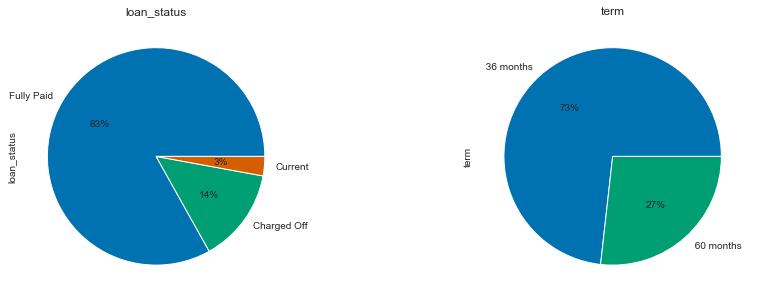

In [64]:
#loan_status, term
plt.figure(figsize=[15,5])

plt.subplot(1, 2, 1)
df.loan_status.value_counts().plot.pie(autopct='%1.0f%%')
plt.title('loan_status', fontsize=12)

plt.subplot(1, 2, 2)
df.term.value_counts().plot.pie(autopct='%1.0f%%')
plt.title('term', fontsize=12)

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

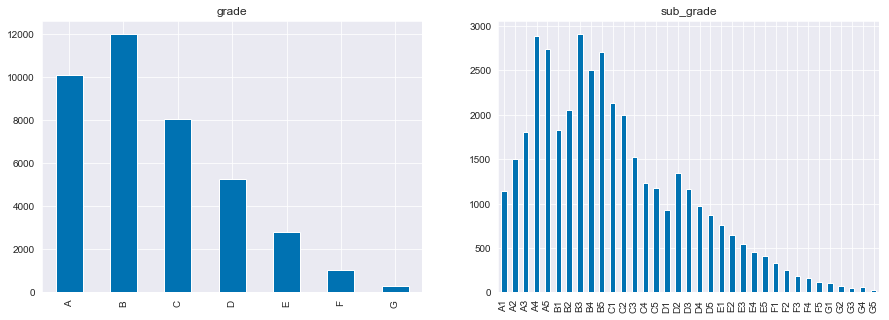

In [65]:
#grade
plt.figure(figsize=[15,5])

plt.subplot(1, 2, 1)
grade_order=sorted(list(df.grade.unique()))
df.grade.value_counts().reindex(grade_order).plot.bar()
plt.title('grade', fontsize=12)

plt.subplot(1, 2, 2)
df.sub_grade.value_counts().reindex(sorted(list(df.sub_grade.unique()))).plot.bar()
plt.title('sub_grade', fontsize=12)

plt.show

#### Observation:
Even though loan application acceptance decreases with decrease in grade, however grade B has a higher frequency than A. This could be because grade A are more affluent and fewer people need a loan.
Withing grades A & B, number of loan application acceptance increases with decrease in subgrades, while for C and lower, the acceptance decrease with decrease in sub-grades. A reason could be that for grades A & B, loans are accepted irrespective of subgrades and more applications are received with decreasing sub grades, whereas for C & below, sub grades have an impact on application acceptance.

In [66]:
#emp_length, home_ownership
df.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', 'unknown'],
      dtype=object)

<function matplotlib.pyplot.show(*args, **kw)>

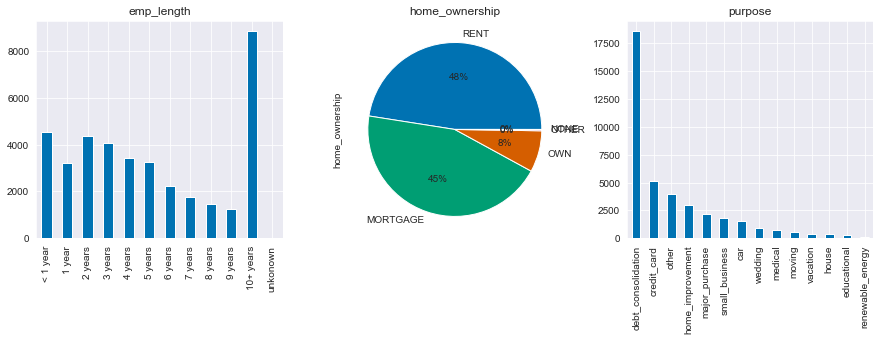

In [67]:
plt.figure(figsize=[15,4])

plt.subplot(1, 3, 1)
emp_length_order=['< 1 year','1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years','9 years','10+ years','unkonown']
df.emp_length.value_counts().reindex(emp_length_order).plot.bar()
plt.title('emp_length', fontsize=12)

plt.subplot(1, 3, 2)
df.home_ownership.value_counts().plot.pie(autopct='%1.0f%%')
plt.title('home_ownership', fontsize=12)

plt.subplot(1, 3, 3)
df.purpose.value_counts().plot.bar()
plt.title('purpose', fontsize=12)

plt.show

#### Observation:
emp_length
Loan applications accepted generally decreases with increase in years if employment, indicating more need of loan in early years of employment. 10+ years has a peak possibly because all 10+ years are bucketed into this category -home_ownership Customers with rented and mortgaged house apply and get accepted for loan the most
Most loans are for debt consolidation
#### Recommendation:
More marketing & sales efforts on employees with <5 years of experience and customers with rented and mortgaged houses

<function matplotlib.pyplot.show(*args, **kw)>

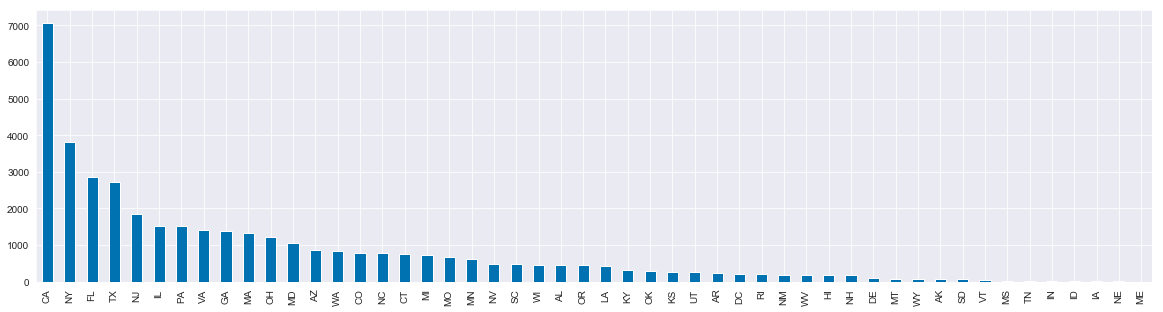

In [68]:
#addr_state
plt.figure(figsize=[20,5])
df.addr_state.value_counts().plot.bar()
plt.show

#### Observation
Highest number of loans from CA

<function matplotlib.pyplot.show(*args, **kw)>

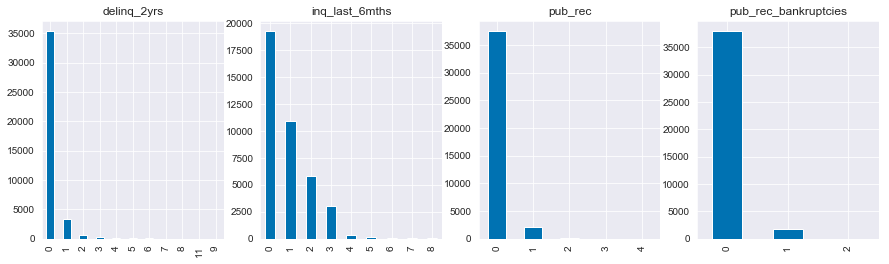

In [69]:
#bureau
plt.figure(figsize=[15,4])

plt.subplot(1, 4, 1)
df.delinq_2yrs.value_counts().plot.bar()
plt.title('delinq_2yrs', fontsize=12)

plt.subplot(1, 4, 2)
df.inq_last_6mths.value_counts().plot.bar()
plt.title('inq_last_6mths', fontsize=12)

plt.subplot(1, 4, 3)
df.pub_rec.value_counts().plot.bar()
plt.title('pub_rec', fontsize=12)

plt.subplot(1, 4, 4)
df.pub_rec_bankruptcies.value_counts().plot.bar()
plt.title('pub_rec_bankruptcies', fontsize=12)

plt.show

#### Observation:
Loan applications are almost always being accepted for customers with no derog records

<function matplotlib.pyplot.show(*args, **kw)>

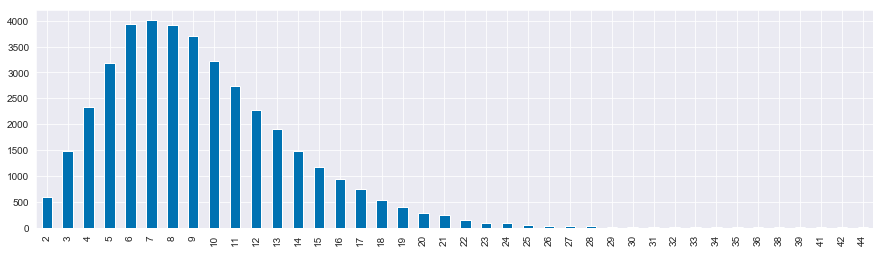

In [70]:
plt.figure(figsize=[15,4])
df.open_acc.value_counts().reindex(sorted(list(df.open_acc.unique()))).plot.bar()
plt.show

#### Observation 
Loan acceptance have a tendency towards 7 open accounts on credit file

<function matplotlib.pyplot.show(*args, **kw)>

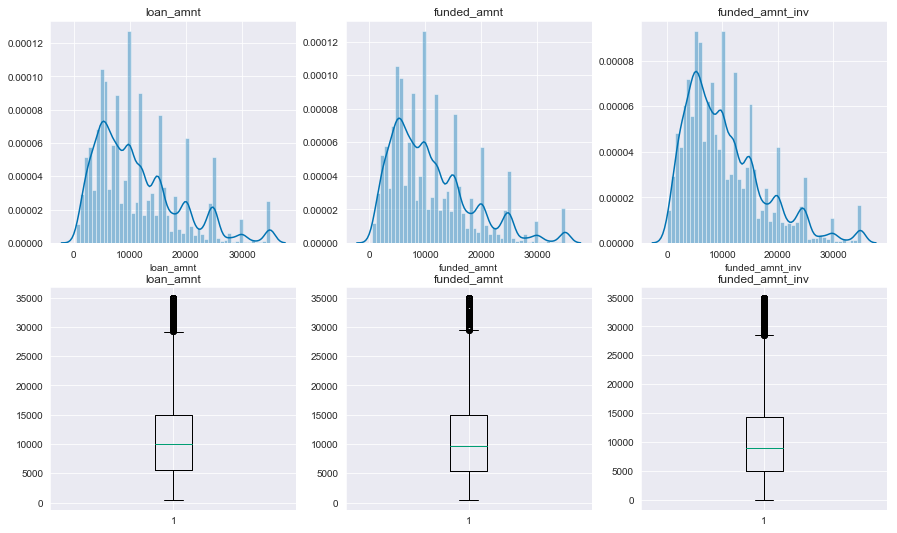

In [71]:
plt.figure(figsize=[15,9])

plt.subplot(2, 3, 1)
sns.distplot(df.loan_amnt)
plt.title('loan_amnt', fontsize=12)

plt.subplot(2, 3, 2)
sns.distplot(df.funded_amnt)
plt.title('funded_amnt', fontsize=12)

plt.subplot(2, 3, 3)
sns.distplot(df.funded_amnt_inv)
plt.title('funded_amnt_inv', fontsize=12)

plt.subplot(2, 3, 4)
plt.boxplot(df.loan_amnt)
plt.title('loan_amnt', fontsize=12)

plt.subplot(2, 3, 5)
plt.boxplot(df.funded_amnt)
plt.title('funded_amnt', fontsize=12)

plt.subplot(2, 3, 6)
plt.boxplot(df.funded_amnt_inv)
plt.title('funded_amnt_inv', fontsize=12)


plt.show

#### Observations
There are peaks at intervals possibly due to rounding off
Most loan amounts are in the range of IQR(5000-15000), however funded_amnt_inv is skewed towards lower values, suggesting reduction of loan_amnt

<function matplotlib.pyplot.show(*args, **kw)>

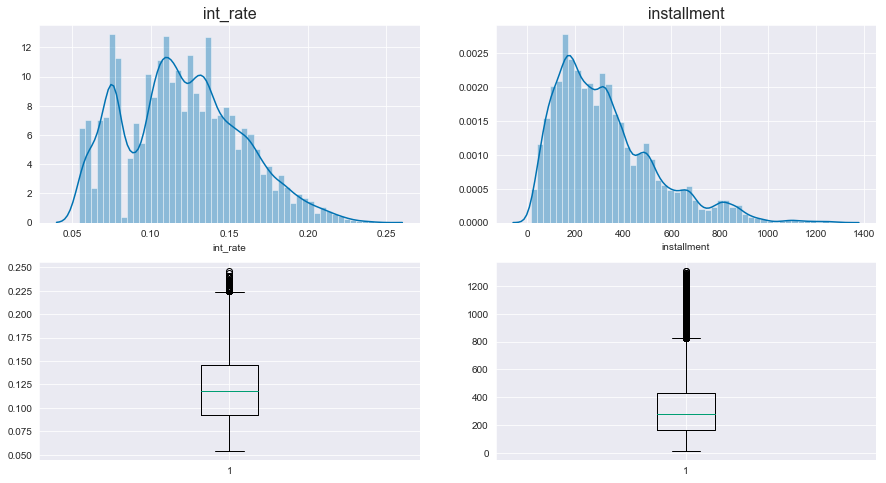

In [72]:
plt.figure(figsize=[15,8])

plt.subplot(2,2,1)
sns.distplot(df.int_rate)
plt.title('int_rate', fontsize=16)

plt.subplot(2,2,2)
sns.distplot(df.installment)
plt.title('installment', fontsize=16)

plt.subplot(2,2,3)
plt.boxplot(df.int_rate)

plt.subplot(2,2,4)
plt.boxplot(df.installment)

plt.show

#### Observation
Very few loans given at 8% int rate. What could be the reason?

Text(0.5, 1.0, 'annual_inc')

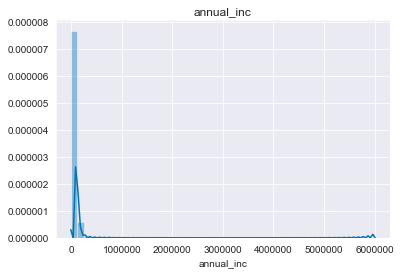

In [73]:
#cust profile
sns.distplot(df.annual_inc)
plt.title('annual_inc', fontsize=12)

In [74]:
df.annual_inc.describe(percentiles=list(np.arange(0,1,0.05)))

count    3.959800e+04
mean     6.903508e+04
std      6.382858e+04
min      4.000000e+03
0%       4.000000e+03
5%       2.400000e+04
10%      3.000000e+04
15%      3.400000e+04
20%      3.762000e+04
25%      4.063250e+04
30%      4.500000e+04
35%      4.800000e+04
40%      5.040000e+04
45%      5.500000e+04
50%      5.900000e+04
55%      6.200000e+04
60%      6.600000e+04
65%      7.100000e+04
70%      7.563420e+04
75%      8.250000e+04
80%      9.000000e+04
85%      1.000000e+05
90%      1.160000e+05
95%      1.420000e+05
max      6.000000e+06
Name: annual_inc, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

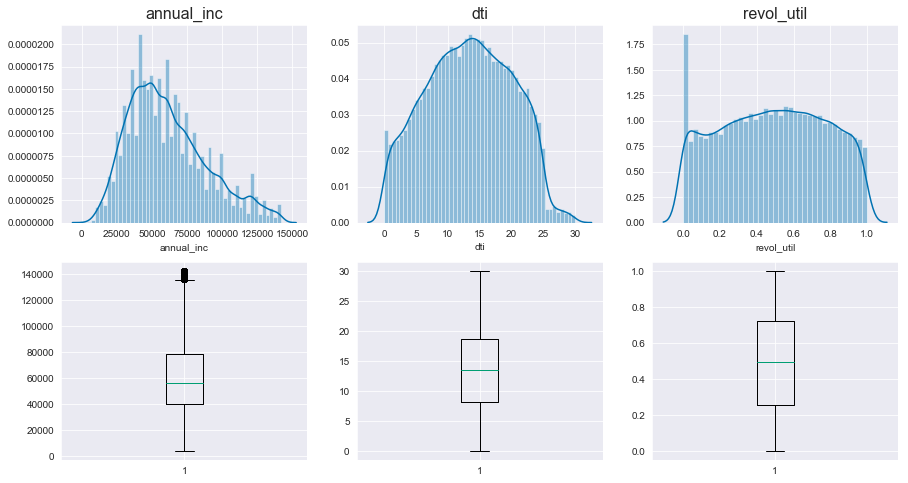

In [75]:
plt.figure(figsize=[15,8])

plt.subplot(2,3,1)
sns.distplot(df[df.annual_inc <= 1.420000e+05].annual_inc)
plt.title('annual_inc', fontsize=16)

plt.subplot(2,3,2)
sns.distplot(df.dti)
plt.title('dti', fontsize=16)

plt.subplot(2,3,3)
sns.distplot(df.revol_util)
plt.title('revol_util', fontsize=16)

plt.subplot(2,3,4)
plt.boxplot(df[df.annual_inc <= 1.420000e+05].annual_inc)   #removing outliers

plt.subplot(2,3,5)
plt.boxplot(df.dti)

plt.subplot(2,3,6)
plt.boxplot(df.revol_util)

plt.show

#### Observations
Spikes in annual income because of round offs.
Maximum loans are given for dti and revol_util towards zero.
revol_util seems to have a uniform distribution, so no relationship with loan data other than the spike at zero.

<function matplotlib.pyplot.show(*args, **kw)>

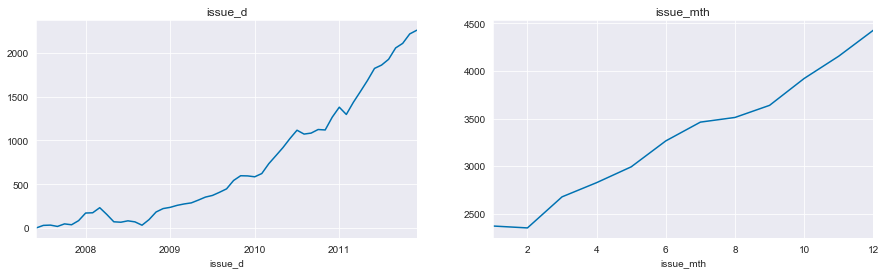

In [76]:
#dates
plt.figure(figsize=[15,4])

plt.subplot(1, 2, 1)
df.groupby(['issue_d'])['id'].count().plot()
plt.title('issue_d', fontsize=12)

plt.subplot(1, 2, 2)
df.groupby(['issue_mth'])['id'].count().plot()
plt.title('issue_mth', fontsize=12)

plt.show

#### Observations
Almost linear growth in loans since 2009
Almost linear growth in loans starting March throughout Dec
Slope: Jan-Feb least number of loans issued| March-May, Jul-Sep growth rates of loan issuance are slower than May-Jul, Sep-Dec

<function matplotlib.pyplot.show(*args, **kw)>

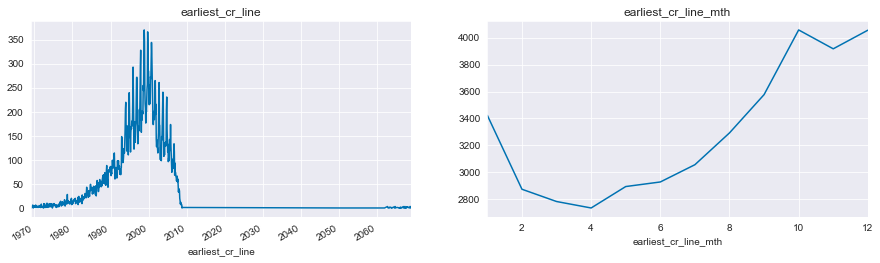

In [77]:
plt.figure(figsize=[15,4])

plt.subplot(1, 2, 1)
df.groupby(['earliest_cr_line'])['id'].count().plot()
plt.title('earliest_cr_line', fontsize=12)

plt.subplot(1, 2, 2)
df.groupby(['earliest_cr_line_mth'])['id'].count().plot()
plt.title('earliest_cr_line_mth', fontsize=12)

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

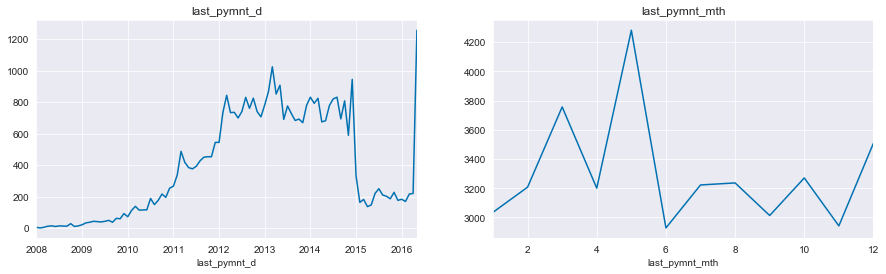

In [78]:
plt.figure(figsize=[15,4])

plt.subplot(1, 2, 1)
df.groupby(['last_pymnt_d'])['id'].count().plot()
plt.title('last_pymnt_d', fontsize=12)

plt.subplot(1, 2, 2)
df.groupby(['last_pymnt_mth'])['id'].count().plot()
plt.title('last_pymnt_mth', fontsize=12)

plt.show

### 4.Bivariate Analysis

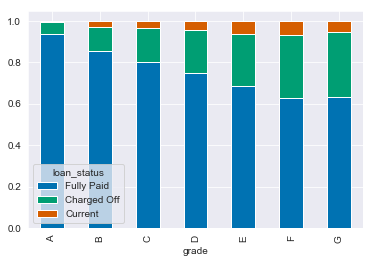

In [79]:
#grade
pivot_ = pd.pivot_table(data=df,values='id',index='grade',columns='loan_status', aggfunc='count')
pivot_pc=pivot_[list(df.loan_status.unique())].apply(lambda x: x/x.sum(),axis=1)

pivot_pc.plot(kind='bar', stacked=True)
plt.show()

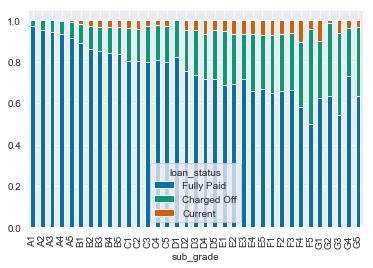

In [80]:
#sub_grade vs loan_status
pivot_ = pd.pivot_table(data=df,values='id',index='sub_grade',columns='loan_status', aggfunc='count')
pivot_pc=pivot_[list(df.loan_status.unique())].apply(lambda x: x/x.sum(),axis=1)

pivot_pc.plot(kind='bar', stacked=True)
plt.show()

#### Observation
Chargeoff frequency increases with decline in grades

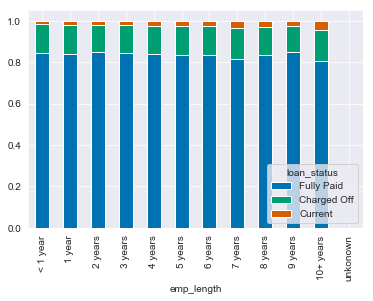

In [81]:
#emp_length vs loan_status
pivot_ = pd.pivot_table(data=df,values='id',index='emp_length',columns='loan_status', aggfunc='count')
pivot_pc=pivot_[list(df.loan_status.unique())].apply(lambda x: x/x.sum(),axis=1)

pivot_pc.reindex(emp_length_order).plot(kind='bar', stacked=True)   #emp_length_order list declared earlier
plt.show()

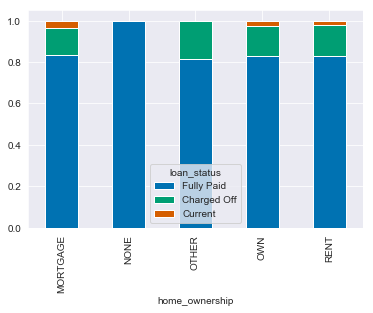

In [82]:
#home_ownership vs loan_status
pivot_ = pd.pivot_table(data=df,values='id',index='home_ownership',columns='loan_status', aggfunc='count')
pivot_pc=pivot_[list(df.loan_status.unique())].apply(lambda x: x/x.sum(),axis=1)

pivot_pc.plot(kind='bar', stacked=True)
plt.show()

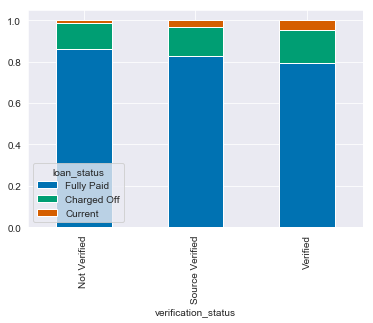

In [83]:
#verification_status vs loan_status
pivot_ = pd.pivot_table(data=df,values='id',index='verification_status',columns='loan_status', aggfunc='count')
pivot_pc=pivot_[list(df.loan_status.unique())].apply(lambda x: x/x.sum(),axis=1)

pivot_pc.plot(kind='bar', stacked=True)
plt.show()

#### Observation
Surprisingly non verified accounts have lower default rates

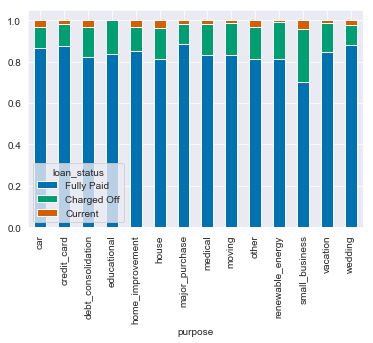

In [84]:
#purpose vs loan_status
pivot_ = pd.pivot_table(data=df,values='id',index='purpose',columns='loan_status', aggfunc='count')
pivot_pc=pivot_[list(df.loan_status.unique())].apply(lambda x: x/x.sum(),axis=1)

pivot_pc.plot(kind='bar', stacked=True)
plt.show()

#### Observation
Purpose with small_business have a very high rate of delinquency

In [85]:
#addr_state vs loan_status
df.addr_state.value_counts()

CA    7071
NY    3803
FL    2862
TX    2715
NJ    1842
IL    1522
PA    1511
VA    1403
GA    1396
MA    1339
OH    1217
MD    1044
AZ     876
WA     839
CO     791
NC     785
CT     750
MI     719
MO     683
MN     612
NV     496
SC     472
WI     458
AL     450
OR     450
LA     436
KY     324
OK     299
KS     270
UT     258
AR     244
DC     212
RI     198
NM     189
WV     176
HI     173
NH     171
DE     113
MT      85
WY      83
AK      80
SD      63
VT      54
MS      19
TN      17
IN       9
ID       6
IA       5
NE       5
ME       3
Name: addr_state, dtype: int64

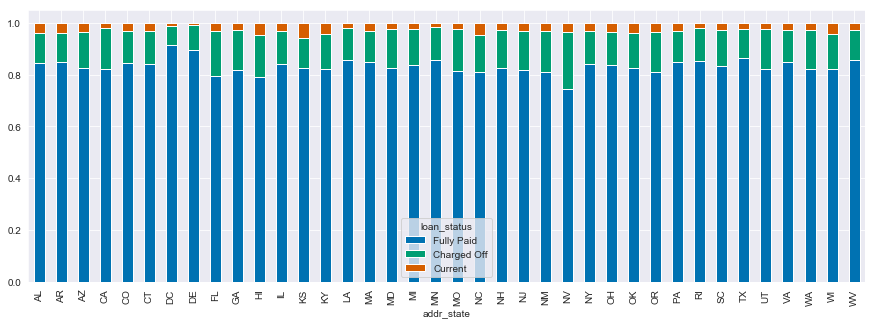

In [86]:
#removing states with frequency <100
ls_states=['CA','NY','FL','TX','NJ','IL','PA','VA','GA','MA','OH','MD','AZ','WA','CO','NC','CT','MI','MO','MN','NV','SC','WI','AL','OR','LA','KY','OK','KS','UT','AR','DC','RI','NM','WV','HI','NH','DE']
df_states=df.loc[df.addr_state.isin(ls_states),:]

pivot_ = pd.pivot_table(data=df_states,values='id',index='addr_state',columns='loan_status', aggfunc='count')
pivot_pc=pivot_[list(df_states.loan_status.unique())].apply(lambda x: x/x.sum(),axis=1)

pivot_pc.plot(kind='bar', stacked=True)
plt.gcf().set_size_inches(15, 5)
plt.show()

#### Observation
NV has the highest default rate followed by FL

<function matplotlib.pyplot.show(*args, **kw)>

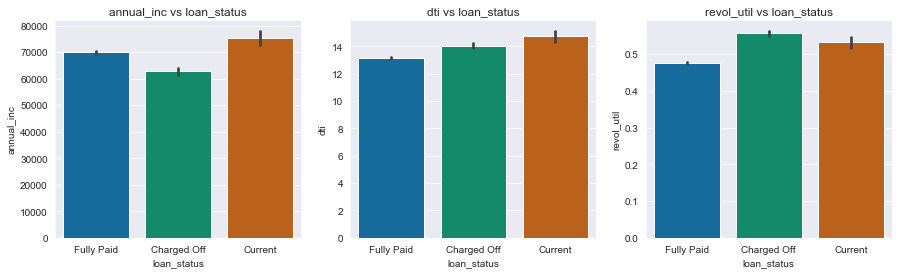

In [87]:
plt.figure(figsize=[15,4])

plt.subplot(1, 3, 1)
sns.barplot(data=df, x='loan_status', y='annual_inc')
plt.title('annual_inc vs loan_status', fontsize=12)

plt.subplot(1, 3, 2)
sns.barplot(data=df, x='loan_status', y='dti')
plt.title('dti vs loan_status', fontsize=12)

plt.subplot(1, 3, 3)
sns.barplot(data=df, x='loan_status', y='revol_util')
plt.title('revol_util vs loan_status', fontsize=12)

plt.show

#### Observations
- Delinquency is high for lower annual income.
- Higher DTI for Charged off customers opposed to Fully paid
- Charge off frequencues higher for high revol_util